In [1]:
from PIL import Image
from scipy import ndimage
from random import randint
import sys
import torch
import numpy as np
import pandas as pd
import torchvision
import matplotlib.pyplot as plt

PATH = "data/"
PHOTOS_PATH = PATH + "photos/"
TENSOR_PATH = PATH + "tensors/"

class dataGenerator(object):

    def __init__(self, IMAGE_SIZE = 400):
        self.IMAGE_SIZE=400
    
    def drawBackground(self,imgMap):
        rgb = (randint(0,255),randint(0,255),randint(0,255))
        for i in range(self.IMAGE_SIZE):
            for j in range(self.IMAGE_SIZE):
                imgMap[i,j] = rgb
        
    def drawLine(self, imgMap, tensorMap, start, lenth):
        r = g = b = 128
        for i in range(start, start + lenth):
            for j in range(self.IMAGE_SIZE):
                imgMap[i,j] = (r,g,b)
                tensorMap[0,i,j] = 1

    def rotateImageAndTensor(self, img, tensorMap, angle):
        #Rotate Image
        imgR = torchvision.transforms.functional.rotate(img,angle)
        #Rotate Tensor
        tensor = torchvision.transforms.ToPILImage(mode='L')(tensorMap)
        tensor = torchvision.transforms.functional.rotate(tensor, -1 * angle)
        tensor = torchvision.transforms.functional.to_tensor(tensor)
        return imgR, tensor
     
    def generateImage(self,lenth):
        img = Image.new('RGB',(self.IMAGE_SIZE,self.IMAGE_SIZE))
        tensorMap = torch.zeros([1,self.IMAGE_SIZE, self.IMAGE_SIZE])
        
        imgMap = img.load()
        
        self.drawBackground(imgMap)
        
        #factor = 0.45   # ft/px
        
        start = randint(10, self.IMAGE_SIZE - lenth)
        self.drawLine(imgMap, tensorMap, start, lenth)

        return img, tensorMap
    
    def showMaskOnImage(self, img, tensor):
        imgTemp = img.copy()
        imgMap = imgTemp.load()
        for i in range(0, self.IMAGE_SIZE):
            for j in range(0, self.IMAGE_SIZE):
                if tensor[0,i,j] == 1:
                    imgMap[i,j] = (255,0,0)
        return imgTemp

In [3]:
#import ImageGenerated_v2
#import pandas as pd
#from random import randint

factor = 0.45
num_of_images = 100

#imageGen = roadImage2()
imageGen = dataGenerator()

for i in range(0,num_of_images):
    if i % 10 == 0:
        print("Picture ",i,"/",num_of_images)
        
    lenth = randint(17,35)
    img, tensor = imageGen.generateImage(lenth)
    
    img2, tensor2 = imageGen.rotateImageAndTensor(img, tensor, randint(0,180))
    
    img.save(PHOTOS_PATH + str(i) + ".png","PNG")
    torch.save(tensor, TENSOR_PATH + str(i) + '.pt')
    
    img2.save(PHOTOS_PATH + str(num_of_images + i) + ".png","PNG")
    torch.save(tensor2, TENSOR_PATH + str(num_of_images + i) + '.pt')    
    
#     for i in range(30,180,30):
#         img2 = img.rotate(i)
#         img2.save(PHOTOS_PATH + FileName + "-" + str(i),"PNG")
#         img2 = imageGen.rotateImage(img,i)
#         img2.save("photos/" + FileName + "-" + str(i),"PNG")         
    
#     FileName = str(i) + ".png"
    
#     img.save("photos/" + FileName,"PNG")

Picture  0
Picture  10
Picture  20
Picture  30
Picture  40
Picture  50
Picture  60
Picture  70
Picture  80
Picture  90


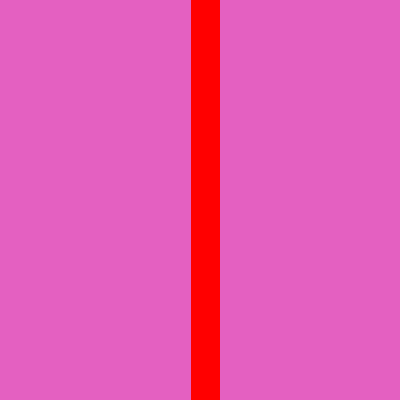

In [3]:
imgRed = imageGen.showMaskOnImage(img, tensor)
imgRed

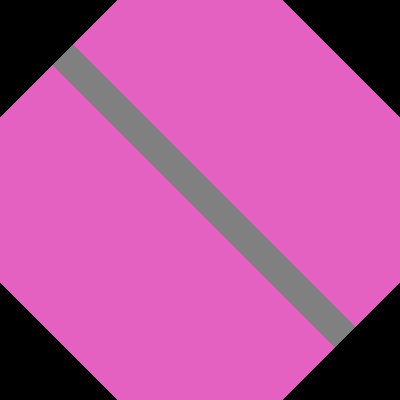

In [4]:
img2, tensor2 = imageGen.rotateImageAndTensor(img, tensor, 45)
img2

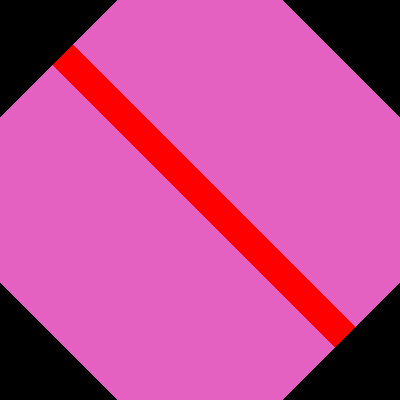

In [6]:
imgRed = imageGen.showMaskOnImage(img2, tensor2)
imgRed

In [11]:
tensor

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])